In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/') 

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sentiment analysis/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv', usecols = ['reviews.rating', 'reviews.text'])

In [ ]:
df.head(10)

,reviews.rating,reviews.text
0,3,I thought it would be as big as small paper bu...
1,5,This kindle is light and easy to use especiall...
2,4,Didnt know how much i'd use a kindle so went f...
3,5,I am 100 happy with my purchase. I caught it o...
4,5,Solid entry level Kindle. Great for kids. Gift...
5,5,This make an excellent ebook reader. Don't exp...
6,5,"I ordered this for my daughter, as I have the ..."
7,4,I bought my Kindle about 2 months ago and the ...
8,5,"amazon kindle is always the best ebook, upgrad..."
9,5,"It's beyond my expectation, and it can even sh..."


In [ ]:
df.sample(5)

,reviews.rating,reviews.text
3801,5,Amazing product from Amazon within budget and ...
3777,5,Inexpensive tablet for him to use and learn on...
28,5,I have several Kindles so knew what to expect....
3011,5,Sound quality is amazing. I really like the ab...
932,5,This product will for sure come in handy. Very...


In [ ]:
df['reviews.rating'].value_counts()

5    3478
4    1208
3     197
1      63
2      54
Name: reviews.rating, dtype: int64

In [ ]:
! pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-coj33dup
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-coj33dup
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11754 sha256=9006321885f85c0eb6fd082bdcd061fb3b1b11fe57c39b9dcdab84d5a523c929
  Stored in directory: /tmp/pip-ephem-wheel-cache-7ctw3m0i/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps
import re

In [ ]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [ ]:
df['reviews.text'] = df['reviews.text'].apply(lambda x: get_clean(x))

In [ ]:
 df.head()

,reviews.rating,reviews.text
0,3,i thought it would be as big as small paper bu...
1,5,this kindle is light and easy to use especiall...
2,4,didnt know how much i would use a kindle so we...
3,5,i am 100 happy with my purchase i caught it on...
4,5,solid entry level kindle great for kids gifted...


**1. SVM**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [ ]:
tfidf = TfidfVectorizer(max_features=40000, ngram_range=(1,5), analyzer='char')

In [ ]:
y = tfidf.fit_transform(df['reviews.text'])
z = df['reviews.rating']

In [ ]:
y.shape, z.shape

((5000, 40000), (5000,))

In [ ]:
y_train, y_test, z_train, z_test = train_test_split(y, z, test_size = 0.2, random_state = 0)

In [ ]:
y_train.shape

(4000, 40000)

In [ ]:
clf = LinearSVC(C=10, class_weight='balanced')
clf.fit(y_train, z_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=10, class_weight='balanced')

In [ ]:
SVM_pred = clf.predict(y_test)

In [ ]:
print(classification_report(z_test, SVM_pred))

              precision    recall  f1-score   support

           1       0.50      0.50      0.50         6
           2       0.00      0.00      0.00        10
           3       0.62      0.32      0.42        41
           4       0.55      0.51      0.53       272
           5       0.79      0.85      0.82       671

    accuracy                           0.73      1000
   macro avg       0.49      0.44      0.45      1000
weighted avg       0.71      0.73      0.72      1000



In [ ]:
x = 'this product is really bad. I do not like it'
x = get_clean(x)
vec = tfidf.transform([x])
clf.predict(vec)

array([1])

In [ ]:
x = 'this product is really good. I liked it so much'
x = get_clean(x)
vec = tfidf.transform([x])
clf.predict(vec)

array([5])

Text(0.5, 145.31999999999996, 'Predicted')

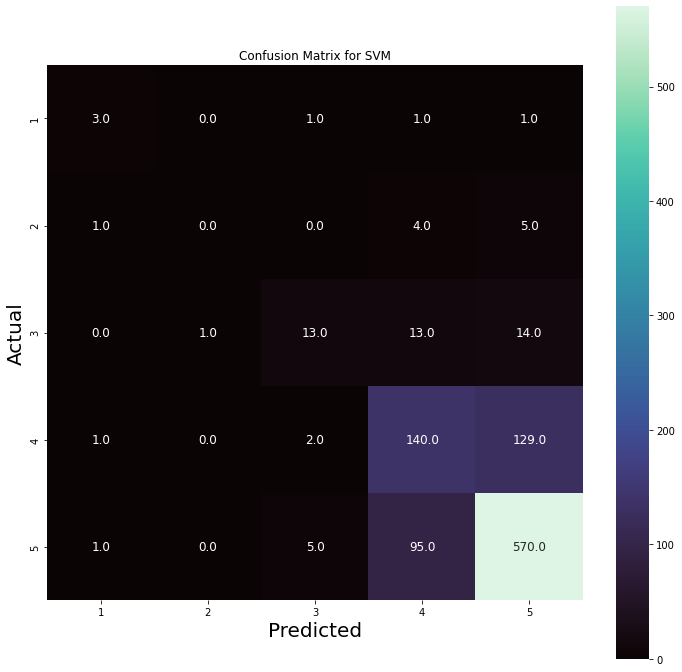

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = SVM_pred
label=['1', '2','3','4', '5']
Ytrue = z_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for SVM")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmat = confusion_matrix(z_test, SVM_pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 3
FP - False Positive 0
FN - False Negative 1
TP - True Positive 0
Accuracy Rate: 0.003
Misclassification Rate: 0.001


**2. Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(max_depth=6, random_state=1)
# Predict test set labels
dt.fit(y_train, z_train)
DT_pred = dt.predict(y_test)

# Compute test set accuracy
acc = accuracy_score(z_test, DT_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.69


Text(0.5, 145.31999999999996, 'Predicted')

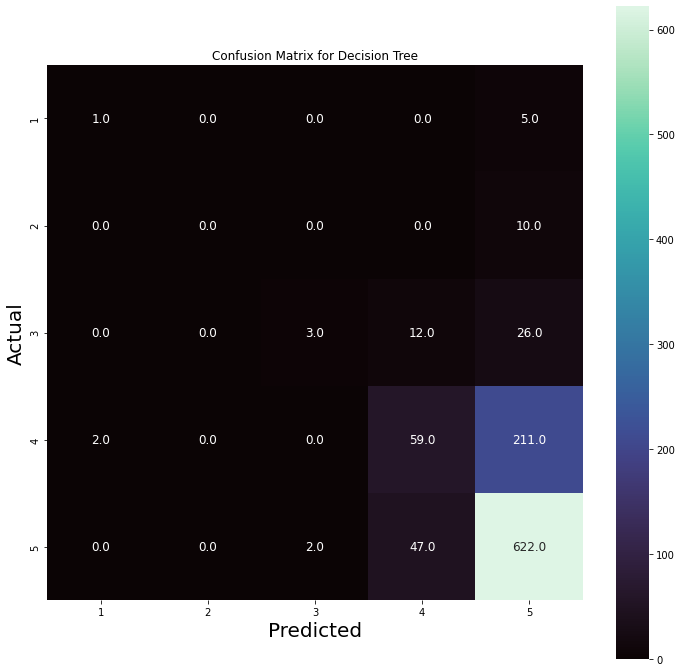

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = DT_pred
label=['1', '2','3','4', '5']
Ytrue = z_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Decision Tree")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

**3. Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf_NB = MultinomialNB()
clf_NB.fit(y_train, z_train)

MultinomialNB()

In [ ]:
NB_pred = clf_NB.predict(y_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(z_test, NB_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        41
           4       0.00      0.00      0.00       272
           5       0.67      1.00      0.80       671

    accuracy                           0.67      1000
   macro avg       0.13      0.20      0.16      1000
weighted avg       0.45      0.67      0.54      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(z_test, NB_pred))
print(classification_report(z_test, NB_pred))

[[  0   0   0   0   6]
 [  0   0   0   0  10]
 [  0   0   0   0  41]
 [  0   0   0   0 272]
 [  0   0   0   0 671]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        41
           4       0.00      0.00      0.00       272
           5       0.67      1.00      0.80       671

    accuracy                           0.67      1000
   macro avg       0.13      0.20      0.16      1000
weighted avg       0.45      0.67      0.54      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 145.31999999999996, 'Predicted')

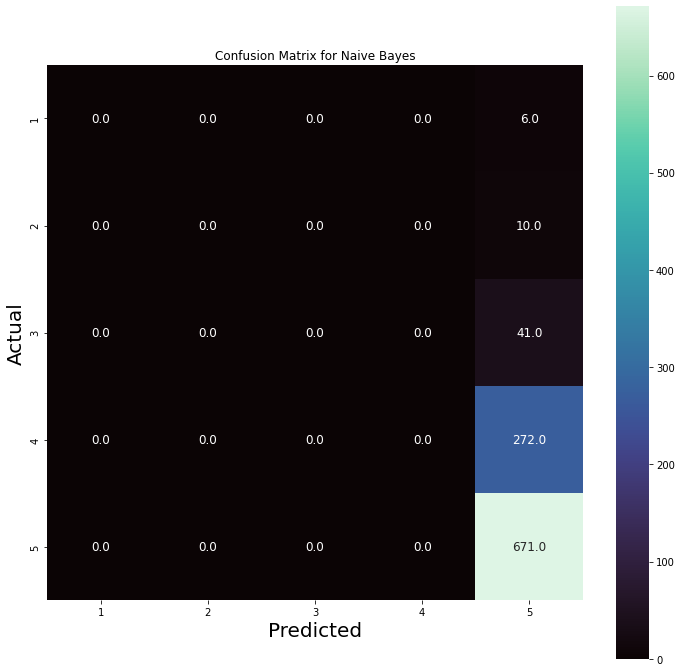

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = NB_pred
label=['1', '2','3','4', '5']
Ytrue = z_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Naive Bayes")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

**4. K-Nearest Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(y_train, z_train)


KNeighborsClassifier()

In [ ]:
KNN_pred = classifier.predict(y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(z_test, KNN_pred))
print(classification_report(z_test, KNN_pred))

[[  2   0   0   0   4]
 [  0   0   0   2   8]
 [  1   0   3   8  29]
 [  1   0   1  60 210]
 [  0   0   3  65 603]]
              precision    recall  f1-score   support

           1       0.50      0.33      0.40         6
           2       0.00      0.00      0.00        10
           3       0.43      0.07      0.12        41
           4       0.44      0.22      0.29       272
           5       0.71      0.90      0.79       671

    accuracy                           0.67      1000
   macro avg       0.42      0.31      0.32      1000
weighted avg       0.62      0.67      0.62      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 145.31999999999996, 'Predicted')

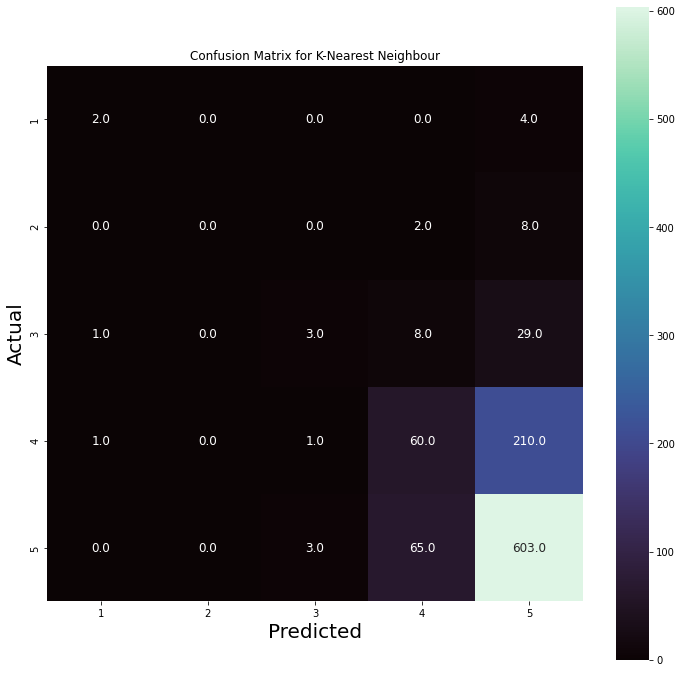

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = KNN_pred
label=['1', '2','3','4', '5']
Ytrue = z_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for K-Nearest Neighbour")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmat = confusion_matrix(z_test, KNN_pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 2
FP - False Positive 0
FN - False Negative 0
TP - True Positive 0
Accuracy Rate: 0.002
Misclassification Rate: 0.0


In [ ]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(y_train, z_train)
    pred_i = knn.predict(y_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
print(error_rate)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'Error Rate')

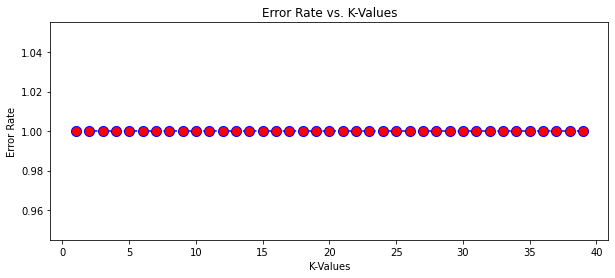

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(y_train, z_train)
pred = knn.predict(y_test)
# Print out classification report and confusion matrix
print(classification_report(z_test, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        41
           4       0.46      0.04      0.08       272
           5       0.68      0.99      0.80       671

    accuracy                           0.67      1000
   macro avg       0.23      0.21      0.18      1000
weighted avg       0.58      0.67      0.56      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cmat = confusion_matrix(z_test, pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 0
FP - False Positive 0
FN - False Negative 0
TP - True Positive 0
Accuracy Rate: 0.0
Misclassification Rate: 0.0


**5. XG BOOST**

In [ ]:
import xgboost as xgb
xgbd = xgb.XGBClassifier(max_depth=10, n_estimators=5000 , learning_rate=.5, n_jobs=-1)

In [ ]:
xgbd.fit(y_train, z_train)
xgb_pred = xgbd.predict(y_test)
xgb_acc=accuracy_score(z_test, xgb_pred)
print(xgb_acc)

0.741


In [ ]:
print(classification_report(z_test, xgb_pred))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         6
           2       0.00      0.00      0.00        10
           3       0.64      0.22      0.33        41
           4       0.67      0.33      0.44       272
           5       0.75      0.95      0.84       671

    accuracy                           0.74      1000
   macro avg       0.61      0.40      0.46      1000
weighted avg       0.72      0.74      0.70      1000



Text(0.5, 145.31999999999996, 'Predicted')

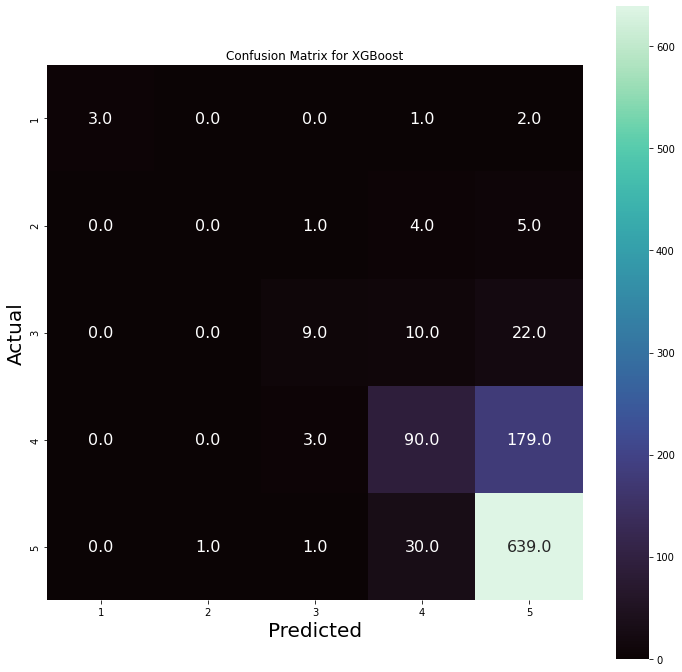

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = xgb_pred
label=['1', '2','3','4', '5']
Ytrue = z_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for XGBoost")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

**6. Neural Network**

In [ ]:
from sklearn.neural_network import MLPClassifier
nnc = MLPClassifier(hidden_layer_sizes=(9),activation="relu",max_iter=1000)
nnc.fit(y_train, z_train)
nnc_predictions =nnc.predict(y_test)
nnc_acc=accuracy_score(z_test, nnc_predictions)
print(nnc_acc)

0.721


In [ ]:
print(classification_report(z_test, nnc_predictions))

              precision    recall  f1-score   support

           1       0.75      0.50      0.60         6
           2       0.00      0.00      0.00        10
           3       0.56      0.24      0.34        41
           4       0.54      0.47      0.50       272
           5       0.78      0.86      0.82       671

    accuracy                           0.72      1000
   macro avg       0.53      0.42      0.45      1000
weighted avg       0.70      0.72      0.71      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 145.31999999999996, 'Predicted')

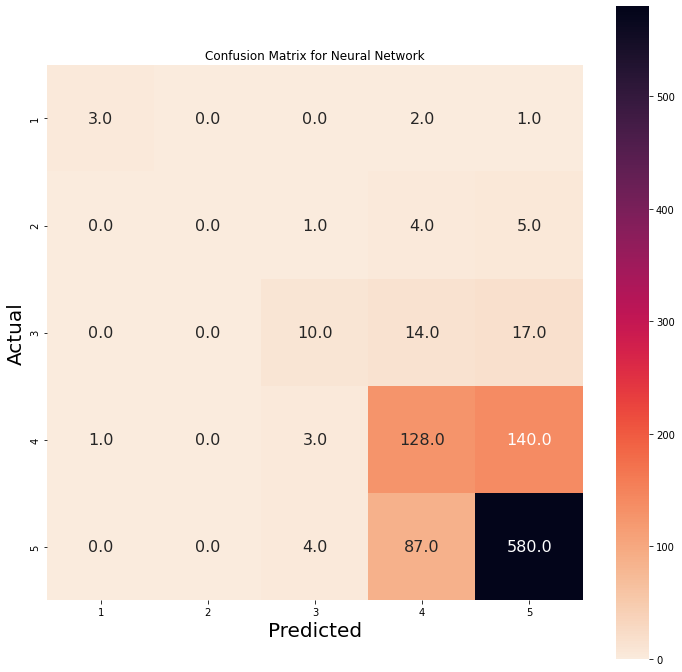

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = nnc_predictions
label=['1', '2','3','4', '5']
Ytrue = z_test
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Neural Network")
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

**7. AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
randomf = RandomForestClassifier(n_jobs=-1)
dtree = DecisionTreeClassifier( criterion='entropy')
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(randomf, n_estimators=500000, learning_rate=.5)
ab.fit(y_train, z_train)
ab_pred = ab.predict(y_test)
ab_acc=accuracy_score(z_test, ab_pred)
print(ab_acc)

0.738


Text(0.5, 145.31999999999996, 'Predicted')

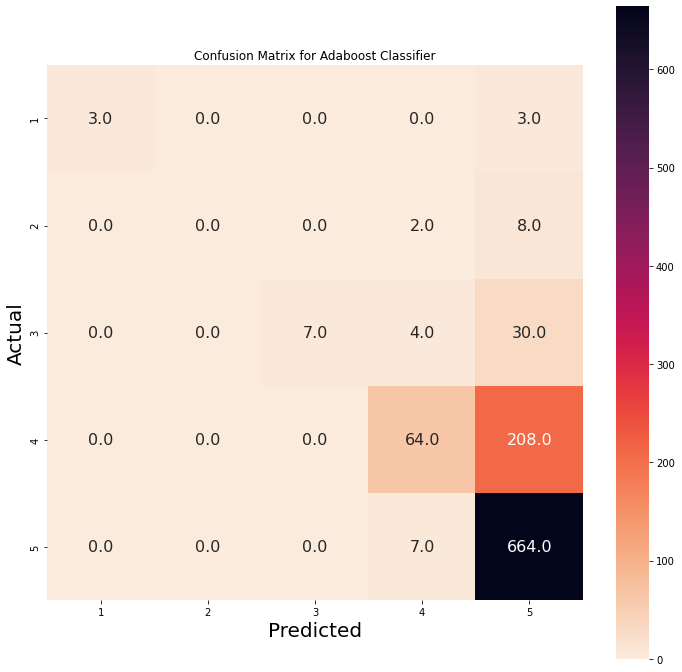

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = ab_pred
label=['1', '2','3','4', '5']
Ytrue = z_test
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Adaboost Classifier")
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

**8. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomf = RandomForestClassifier(n_estimators=100)
randomf.fit(y_train, z_train)
rf_pred = randomf.predict(y_test)
rf_acc=accuracy_score(z_test, rf_pred)
print(rf_acc)

0.733


Text(0.5, 145.31999999999996, 'Predicted')

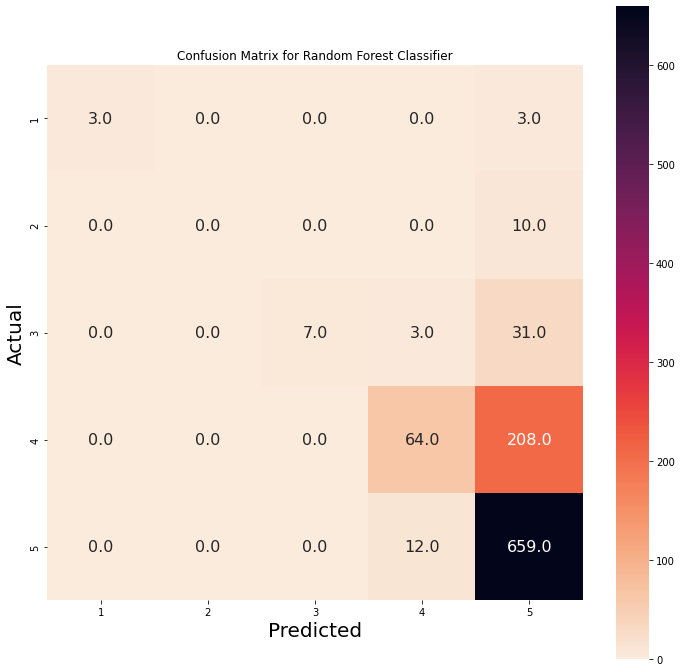

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = rf_pred
label=['1', '2','3','4', '5']
Ytrue = z_test
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Random Forest Classifier")
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

**SVM_SVC 2**

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(y_train,z_train)

SVC(kernel='linear', random_state=0)

In [ ]:
svm_acc = classifier.predict(y_test)

In [ ]:
print(svm_acc)

[4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 4 5 5 5 5 4 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 4 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 4 4 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 4 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5
 5 5 5 5 4 4 5 5 5 5 5 5 5 5 4 5 5 4 5 4 1 5 5 4 5 5 5 5 4 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 4 4 5 5 5 5 5 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5
 5 5 5 4 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5
 4 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5
 5 5 5 5 5 5 5 4 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5
 5 5 5 5 4 5 5 5 5 5 5 5 

In [ ]:
print(classification_report(z_test, svm_acc))

              precision    recall  f1-score   support

           1       1.00      0.33      0.50         6
           2       0.00      0.00      0.00        10
           3       1.00      0.02      0.05        41
           4       0.62      0.20      0.30       272
           5       0.71      0.97      0.82       671

    accuracy                           0.71      1000
   macro avg       0.67      0.30      0.33      1000
weighted avg       0.70      0.71      0.64      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 145.31999999999996, 'Predicted')

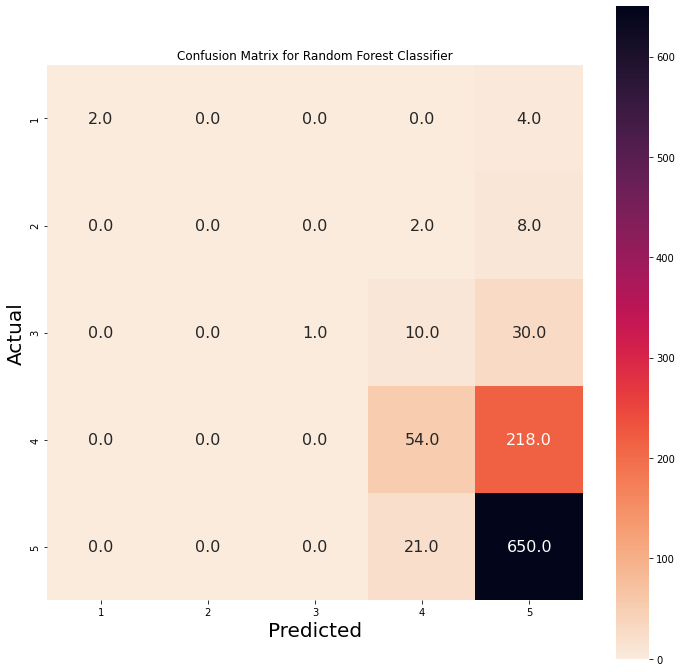

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = svm_acc
label=['1', '2','3','4', '5']
Ytrue = z_test
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Random Forest Classifier")
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

**Apriori**

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Sentiment analysis/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv',  header = None)

In [ ]:
transactions = []

In [ ]:
for i in range(0,5001):
  transactions.append([str(dataset.values[i,j]) for j in range (0,20)])

In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=b5b8cd292e423840b472460747e2ea487000b5655c5f83dc045d4b28582528eb
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
from apyori import apriori
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

In [ ]:
results = list(rules)

In [ ]:
print(len(results))

0


**RNN**

In [ ]:
import tensorflow as tf
import keras

In [ ]:
ds = pd.read_csv('/content/drive/MyDrive/Sentiment analysis/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv', usecols = ['reviews.rating', 'reviews.text'])

In [ ]:
tokenizer = keras.preprocessing.text.Tokenizer(char_level = True)
tokenizer.fit_on_texts(ds['reviews.text'])

In [ ]:
tokenizer.texts_to_sequences(['First'])

[[18, 6, 9, 7, 3]]

In [ ]:
tokenizer.sequences_to_texts([[18, 6, 9, 7, 3]])

['f i r s t']

In [ ]:
max_id = len(tokenizer.word_index)

In [ ]:
dataset_size = tokenizer.document_count

In [ ]:
train_size = dataset_size *90//100

In [ ]:
#dataset1 = tf.data.Dataset.from_tensor_slices(encoded [:train_size])